## To do 

> One possibility is to plot both rd(omega_b, omega_c, n_s)/rd(omega_b_fiducial, omega_c_fiducial, n_s_fiducial) and s_LP(omega_b, omega_c, n_s_fiducial)/s_LP(omega_b_fiducial, omega_c_fiducial, n_s_fiducial) for a wide range of parameter values. 
We know already that they are different but they are maybe equivalent for small variations around the fiducial value and this would explain the CMB results. 
As you see, we will probably find that at more than 10sigma from the Planck best fit, the n_s Linear Point dependence will start to be not negligible. We shall show and comment on this result too. rd instead is n_s independent by definition.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
# functions to get LP from cosmology
import linear_point as lp
# doing cosmological calculations from parameters
import camb

%matplotlib inline

In [6]:
# for plots
import seaborn as sns
sns.set_style("ticks", 
              {'axes.grid': True, 'grid.linestyle': '--'}),
              #"xtick.direction": "in","ytick.direction": "in"})
sns.set_context("talk", font_scale=1.1)
sns.set_palette("Set1")

In [7]:
# creanting instance of CAMBparams object
pars = camb.CAMBparams()
# krange
kmin = 0.001
kmax = 10.

In [8]:
# fiducial TT,TE,EE + lowP
ombh2_fid=0.02225
omch2_fid=0.1198
h_fid = 0.6790
tau_fid = 0.079
ns_fid=0.9645
As_fid=2.207e-9
# sigmas
ombh2_sig = 0.00016
omch2_sig = 0.0015
ns_sig = 0.0049

In [9]:
def get_results(pars, z=0, ombh2 = ombh2_fid, omch2 = omch2_fid,
                h = h_fid, tau = tau_fid, As = As_fid, ns = ns_fid):
    pars.set_cosmology(ombh2=ombh2,
                       omch2 =omch2,
                       H0=100*h,
                       tau=tau)
    pars.InitPower.set_params(ns=ns,
                              As=As)
    pars.set_matter_power(
        redshifts=[z], kmax=kmax, nonlinear=False, k_per_logint=0)
    return camb.get_results(pars)

def get_lp(results, kmin=kmin, kmax=kmax):
    dip, peak = lp.lp_from_cosmo_mpc(results, kmin, kmax)
    return (dip+peak)/2

def get_rd(results):
    return results.get_derived_params()['rdrag']

def get_lp_rd_ratio(results):
    lp = get_lp(results)
    rd = get_rd(results)
    return lp/rd

In [10]:
# fiducial
results = get_results(pars)
lp_fid = get_lp(results)
rd_fid = get_rd(results)
print("lp_fid:{:.2f} , rd_fid:{:.2f}".format(lp_fid, rd_fid))

lp_fid:138.24 , rd_fid:147.28


In [84]:
# for parameter exploration
steps = 40
sigma_range = 10
# getting values
ombh2_vals = np.linspace(ombh2_fid - sigma_range*ombh2_sig,
                         ombh2_fid + sigma_range*ombh2_sig, steps)

omch2_vals = np.linspace(omch2_fid - sigma_range*omch2_sig,
                         omch2_fid + sigma_range*omch2_sig, steps)

ns_vals = np.linspace(ns_fid - sigma_range*ns_sig,
                         ns_fid + sigma_range*ns_sig, steps)

In [85]:
# getting results
#ombh2
df_ombh2 = pd.DataFrame(columns=['ombh2','lp','rd'])

for i, ombh2 in enumerate(ombh2_vals):
    results = get_results(pars, ombh2 = ombh2)
    df_ombh2.loc[i] = [ombh2, get_lp(results), get_rd(results)]
    
#ombh2
df_omch2 = pd.DataFrame(columns=['omch2','lp','rd'])

for i, omch2 in enumerate(omch2_vals):
    results = get_results(pars, omch2 = omch2)
    df_omch2.loc[i] = [omch2, get_lp(results), get_rd(results)]
    
#ombh2
df_ns = pd.DataFrame(columns=['ns','lp','rd'])

for i, ns in enumerate(ns_vals):
    results = get_results(pars, ns = ns)
    df_ns.loc[i] = [ns, get_lp(results), get_rd(results)]

In [86]:
df_ombh2.to_pickle('./output/lp_rd/df_ombh2.pkl')
df_omch2.to_pickle('./output/lp_rd/df_omch2.pkl')
df_ns.to_pickle('./output/lp_rd/df_ns.pkl')

##  plotting r/rfid

In [18]:
df_ombh2 = pd.read_pickle('./output/lp_rd/df_ombh2.pkl')
df_omch2 = pd.read_pickle('./output/lp_rd/df_omch2.pkl')
df_ns = pd.read_pickle('./output/lp_rd/df_ns.pkl')

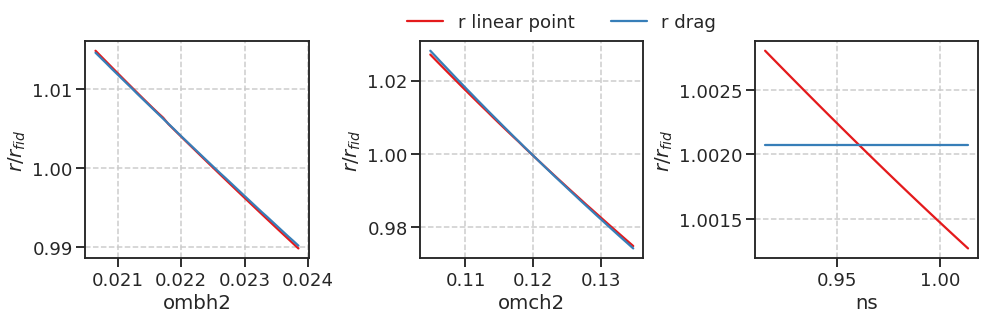

In [21]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(16,4), sharey=False)
axes = [ax1, ax2, ax3]
# ax1
df = df_ombh2.copy()
ax1.plot(df.iloc[:,0], df.loc[:,'lp']/lp_fid, label='r linear point')
ax1.plot(df.iloc[:,0], df.loc[:,'rd']/rd_fid, label='r drag')
ax1.set_xlabel(df.columns[0])
ax1.set_ylabel(r'$r/r_{fid}$')

# ax2
df = df_omch2.copy()
ax2.plot(df.iloc[:,0], df.loc[:,'lp']/lp_fid, label='r linear point')
ax2.plot(df.iloc[:,0], df.loc[:,'rd']/rd_fid, label='r drag')
ax2.set_xlabel(df.columns[0])
ax2.set_ylabel(r'$r/r_{fid}$')

# ax2
df = df_ns.copy()
ax3.plot(df.iloc[:,0], df.loc[:,'lp']/lp_fid, label='r linear point')
ax3.plot(df.iloc[:,0], df.loc[:,'rd']/rd_fid, label='r drag')
ax3.set_xlabel(df.columns[0])
ax3.set_ylabel(r'$r/r_{fid}$')

# legend
ax1.legend(loc='best',ncol=2,frameon=False, bbox_to_anchor=(2.9, 1.2))

#
plt.subplots_adjust(wspace=0.5)

#ax3.set_ylim(0.9985,1.0015)
#ax3.set_yticks([0.999, 1.000, 1.001])


plt.savefig('./Figures/lp_rd/r_over_r_fid_lp_and_rdrag.pdf', dpi=200,
           bbox_inches='tight')
plt.show()

## plotting r_lp/r_drag

In [23]:
(df_ns.lp.max() - df_ns.lp.min())/

0.2113146277696103

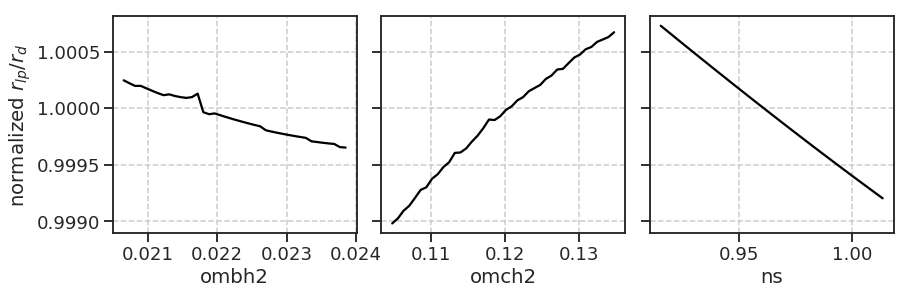

In [25]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(14,4), sharey=True)
axes = [ax1, ax2, ax3]
factor = rd_fid/lp_fid
# ax1
df = df_ombh2.copy()
ax1.plot(df.iloc[:,0], factor*df.loc[:,'lp']/df.loc[:,'rd'],'k')
ax1.set_xlabel(df.columns[0])
ax1.set_ylabel(r'normalized $r_{lp}/r_{d}$') # update label - normalized ratio now

# ax2
df = df_omch2.copy()
ax2.plot(df.iloc[:,0], factor*df.loc[:,'lp']/df.loc[:,'rd'],'k')
ax2.set_xlabel(df.columns[0])
#ax2.set_ylabel(r'$r/r_{fid}$')

# ax2
df = df_ns.copy()
ax3.plot(df.iloc[:,0], factor*df.loc[:,'lp']/df.loc[:,'rd'],'k')
ax3.set_xlabel(df.columns[0])
#ax3.set_ylabel(r'$r/r_{fid}$')

#
plt.subplots_adjust(wspace=0.1)

# plt.savefig('./Figures/lp_rd/rlp_over_rdrag.pdf', dpi=200,
#            bbox_inches='tight')

plt.show()

(0.9384, 0.9387)

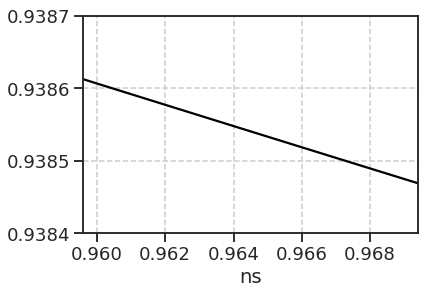

In [27]:
ax3 = plt.gca()

df = df_ns.copy()
ax3.plot(df.iloc[:,0], df.loc[:,'lp']/df.loc[:,'rd'],'k')
ax3.set_xlabel(df.columns[0])
ax3.set_xlim(ns_fid- ns_sig, ns_fid + ns_sig)
ax3.set_ylim(0.9384,0.9387)

(0.998, 1.002)

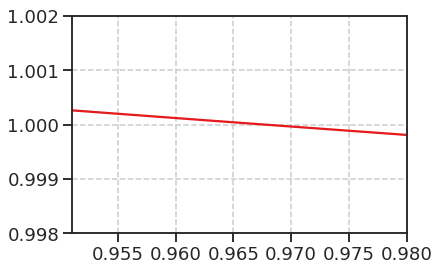

In [139]:
plt.plot(df_ns['ns'], df_ns['lp']/lp_fid)
plt.xlim(0.951, 0.980)
plt.ylim(0.998,1.002)